# My EDA of the StackOverflow 2024 Developer Survey Data

## Background


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pprint
%pprint
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
import geopandas as gpd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Pretty printing has been turned OFF


In [2]:
data = pd.read_csv('data/survey_results_public_training.csv')
data.head()

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,51005,51006,I am a developer by profession,55-64 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","On the job training;School (i.e., University, ...",...,20.0,20.0,0.0,20.0,0.0,0.0,Appropriate in length,Easy,NaN,9.0
1,23933,23934,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,...,49.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,98814.0,9.0
2,59120,59121,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",...,5.0,15.0,15.0,15.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,NaN,3.0
3,1552,1553,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,...,50.0,0.0,0.0,30.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,83777.0,2.0
4,61241,61242,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby;Contribute to open-source projects;Boots...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Developers who use artificial intelligence as part of their development process make more money

My rationale behind 

<Axes: xlabel='ConvertedCompYearly', ylabel='AISelect'>

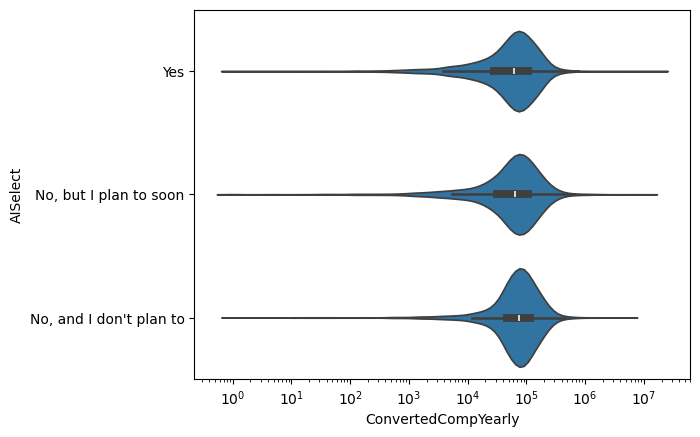

In [3]:
ai_data = data[['AISelect', 'ConvertedCompYearly']].dropna()

yes_ai = ai_data['ConvertedCompYearly'].where(ai_data['AISelect'] == 'Yes').dropna()
plan_ai = ai_data['ConvertedCompYearly'].where(ai_data['AISelect'] == 'No, but I plan to soon').dropna()
no_ai = ai_data['ConvertedCompYearly'].where(ai_data['AISelect'] == 'No, and I don\'t plan to').dropna()
# plt.boxplot([yes_ai, plan_ai, no_ai])
# Add label to indicate that the x axis is on log scale
sns.violinplot(data=ai_data, x='ConvertedCompYearly', y='AISelect', log_scale=True)
# sns.violinplot(data=ai_data, x='ConvertedCompYearly', y='AISelect', log_scale=True, inner="quart")
# sns.violinplot(data=ai_data, x='ConvertedCompYearly', y='AISelect', log_scale=True, inner="")
# Can I add a vertical bar or anything which can tell me the numeric value of the white bars?
# Or tell me the numeric 

# More experienced developers use less artificial intelligence

<Axes: xlabel='YearsCodePro', ylabel='AISelect'>

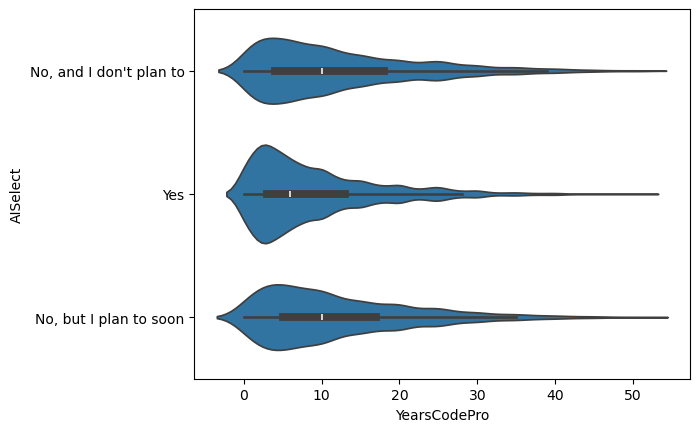

In [4]:
dev_exp_ai = data[['AISelect', 'YearsCodePro']].dropna()
# for row in dev_exp_ai.index:
#     if dev_exp_ai.loc[row, 'YearsCodePro'] == 'Less than 1 year':
#         dev_exp_ai.loc[row, 'YearsCodePro'] = 0
#     elif dev_exp_ai.loc[row, 'YearsCodePro'] == 'More than 50 years':
#         dev_exp_ai.loc[row, 'YearsCodePro'] = 51

def yearfunc(year):
    if year == 'Less than 1 year':
        return np.int64(0)
    elif year == 'More than 50 years':
        return np.int64(51)
    else:
        return np.int64(year)

# clean_YearsCodePro = 
dev_exp_ai['YearsCodePro'] = dev_exp_ai['YearsCodePro'].apply(yearfunc)

# dev_exp_ai['YearsCodePro'] = dev_exp_ai['YearsCodePro'].astype(np.int64)

dev_exp_ai_use = dev_exp_ai[dev_exp_ai['AISelect'] == 'Yes']['YearsCodePro']
dev_exp_ai_no = dev_exp_ai[dev_exp_ai['AISelect'] != 'Yes']['YearsCodePro']
sns.violinplot(data=dev_exp_ai, x='YearsCodePro', y='AISelect')
# fig, ax = plt.subplots()
# ax.hist(dev_exp_ai_use, edgecolor='b', fill=False)
# ax.hist(dev_exp_ai_no, edgecolor='r', fill=False)
# plt.xlabel('Experience (Years)')
# plt.ylabel('Number of Developers')
# plt.title('Years of Experience Count With and Without Using AI')
# plt.show()


# Do programmers who code outside of work make more money?

<Axes: xlabel='ConvertedCompYearly', ylabel='CodingActivities'>

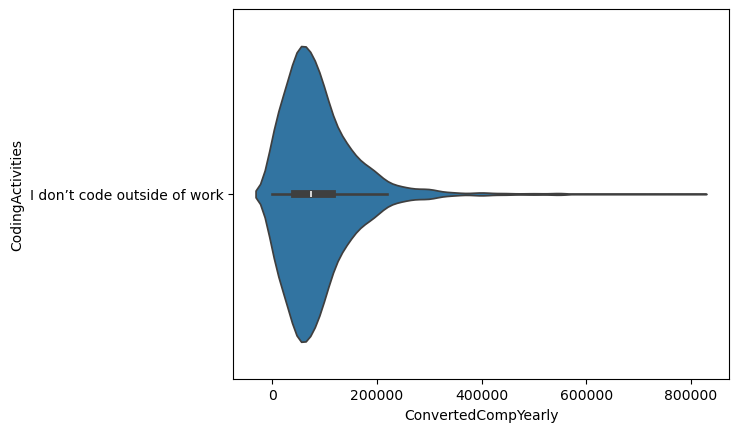

In [5]:
options = ['Hobby', 
           'Freelance/contract work', 
           'Contribute to open-source projects', 
           'Bootstrapping a business', 
           'School or academic work', 
           'Professional development or self-paced learning from online courses',
           'I don’t code outside of work']

prog_activities = data[['CodingActivities', 'ConvertedCompYearly']].dropna()
prog_activities['CodingActivities'].iloc[1].split(';')



no_activities = []
yes_activities = []
for row in prog_activities.iterrows():
    if 'I don’t code outside of work' in row[1]['CodingActivities'].split(';'):
        no_activities.append({
            'index': row[0],
            'CodingActivities': row[1]['CodingActivities'],
            'ConvertedCompYearly': row[1]['ConvertedCompYearly']
            })
    else:
        yes_activities.append({
            'index': row[0],
            'CodingActivities': row[1]['CodingActivities'],
            'ConvertedCompYearly': row[1]['ConvertedCompYearly']
            })

no_prog_outside = pd.DataFrame(no_activities)
no_prog_outside.set_index('index', inplace=True)

yes_prog_outside = pd.DataFrame(yes_activities)
yes_prog_outside.set_index('index', inplace=True)

# no_prog_outside.plot()
# yes_prog_outside.plot()

sns.violinplot(data=no_prog_outside, x='ConvertedCompYearly', y='CodingActivities')

# What's a better way to visualize this?
# How do I stop using log units?

# EDA With Indicator Variables
Chapter 14.1.1
Taking the prog langs and making them into a table where use of the lang means a 1 in that spot, all else zeros

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48], [Text(0, 0, 'C'), Text(1, 0, 'C++'), Text(2, 0, 'Java'), Text(3, 0, 'Python'), Text(4, 0, 'Bash/Shell (all shells)'), Text(5, 0, 'Go'), Text(6, 0, 'Haskell'), Text(7, 0, 'Prolog'), Text(8, 0, 'R'), Text(9, 0, 'Rust'), Text(10, 0, 'HTML/CSS'), Text(11, 0, 'SQL'), Text(12, 0, 'TypeScript'), Text(13, 0, 'C#'), Text(14, 0, 'PowerShell'), Text(15, 0, 'JavaScript'), Text(16, 0, 'PHP'), Text(17, 0, 'Groovy'), Text(18, 0, 'VBA'), Text(19, 0, 'Lua'), Text(20, 0, 'Visual Basic (.Net)'), Text(21, 0, 'Delphi'), Text(22, 0, 'Assembly'), Text(23, 0, 'Dart'), Text(24, 0, 'Kotlin'), Text(25, 0, 'Ruby'), Text(26, 0, 'Swift'), Text(27, 0, 'Crystal'), Text(28, 0, 'MicroPython'), Text(29, 0, 'Perl'), Text(30, 0, 'Fortran'), Text(31, 0, 'MATLAB'), Text(32, 0, 'Julia'), Text(33, 0, 'Scala'), Text(34, 0, 'Elixir'), Text(35

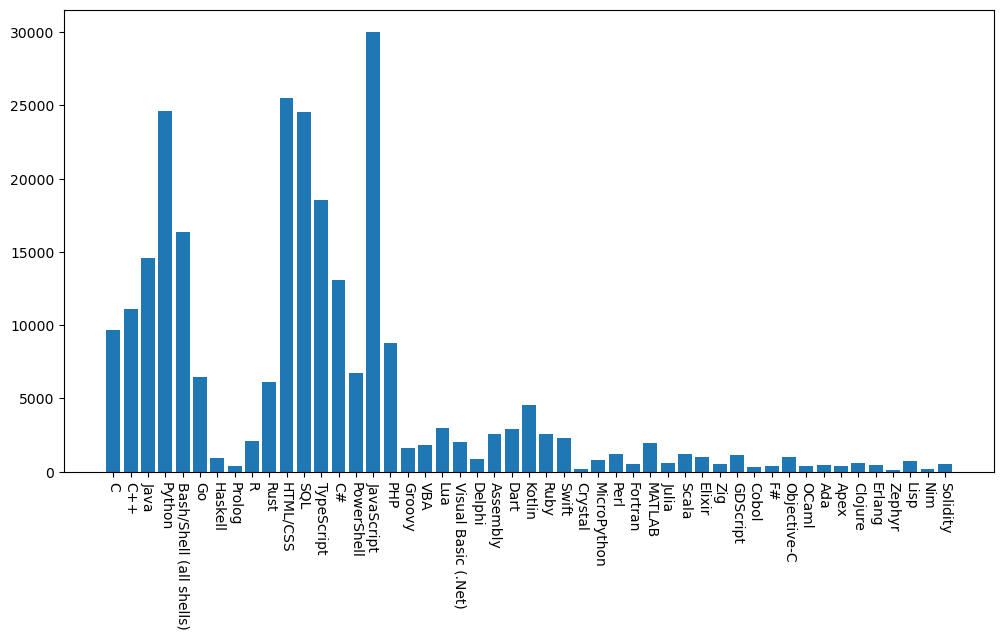

In [6]:
langs = data['LanguageHaveWorkedWith'].dropna()
# ethics = data['AIEthics'].dropna()
# langs[0].split(";")
unique_langs = set()
large_list = []
# for row in ethics:
for row in langs:
    # print(row)
    # print(row.split(";"))
    for lang in row.split(";"):
        unique_langs.add(lang)
        large_list.append(lang)
        
    
# unique_langs
lang_counts = Counter(large_list)
# lang_counts
plt.figure(figsize=(12, 6))
plt.bar(lang_counts.keys(), lang_counts.values())
plt.xticks(rotation=-90)

percent-trimmed means
trimming the outliers out of the dataset

<Axes: >

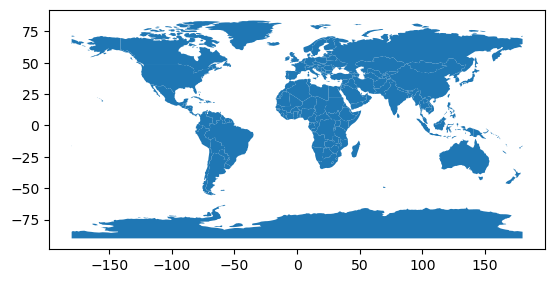

In [9]:
countries = data['Country'].dropna()
countries
country_counts = Counter(countries)
country_counts

world = gpd.read_file('data/geopandas/ne_110m_admin_0_countries.dbf')
# world.plot()
world

# dev_geo = gpd.GeoDataFrame(countries)
dev_geo = gpd.GeoDataFrame({'Country': country_counts,
                            'geometry': world['geometry']},
                           index=data.index)
dev_geo.set_geometry(col='geometry')
dev_geo.plot()
# plt.figure(figsize=(12, 12))
# plt.xticks(rotation=-90)
# plt.bar(country_counts.keys(), country_counts.values())

/var/folders/lm/1b6g2_5j72j1h3qmrgj124dh0000gn/T/ipykernel_77467/3790291563.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['country_centroid'] = world.to_crs(epsg=4326).centroid


KeyError: 177

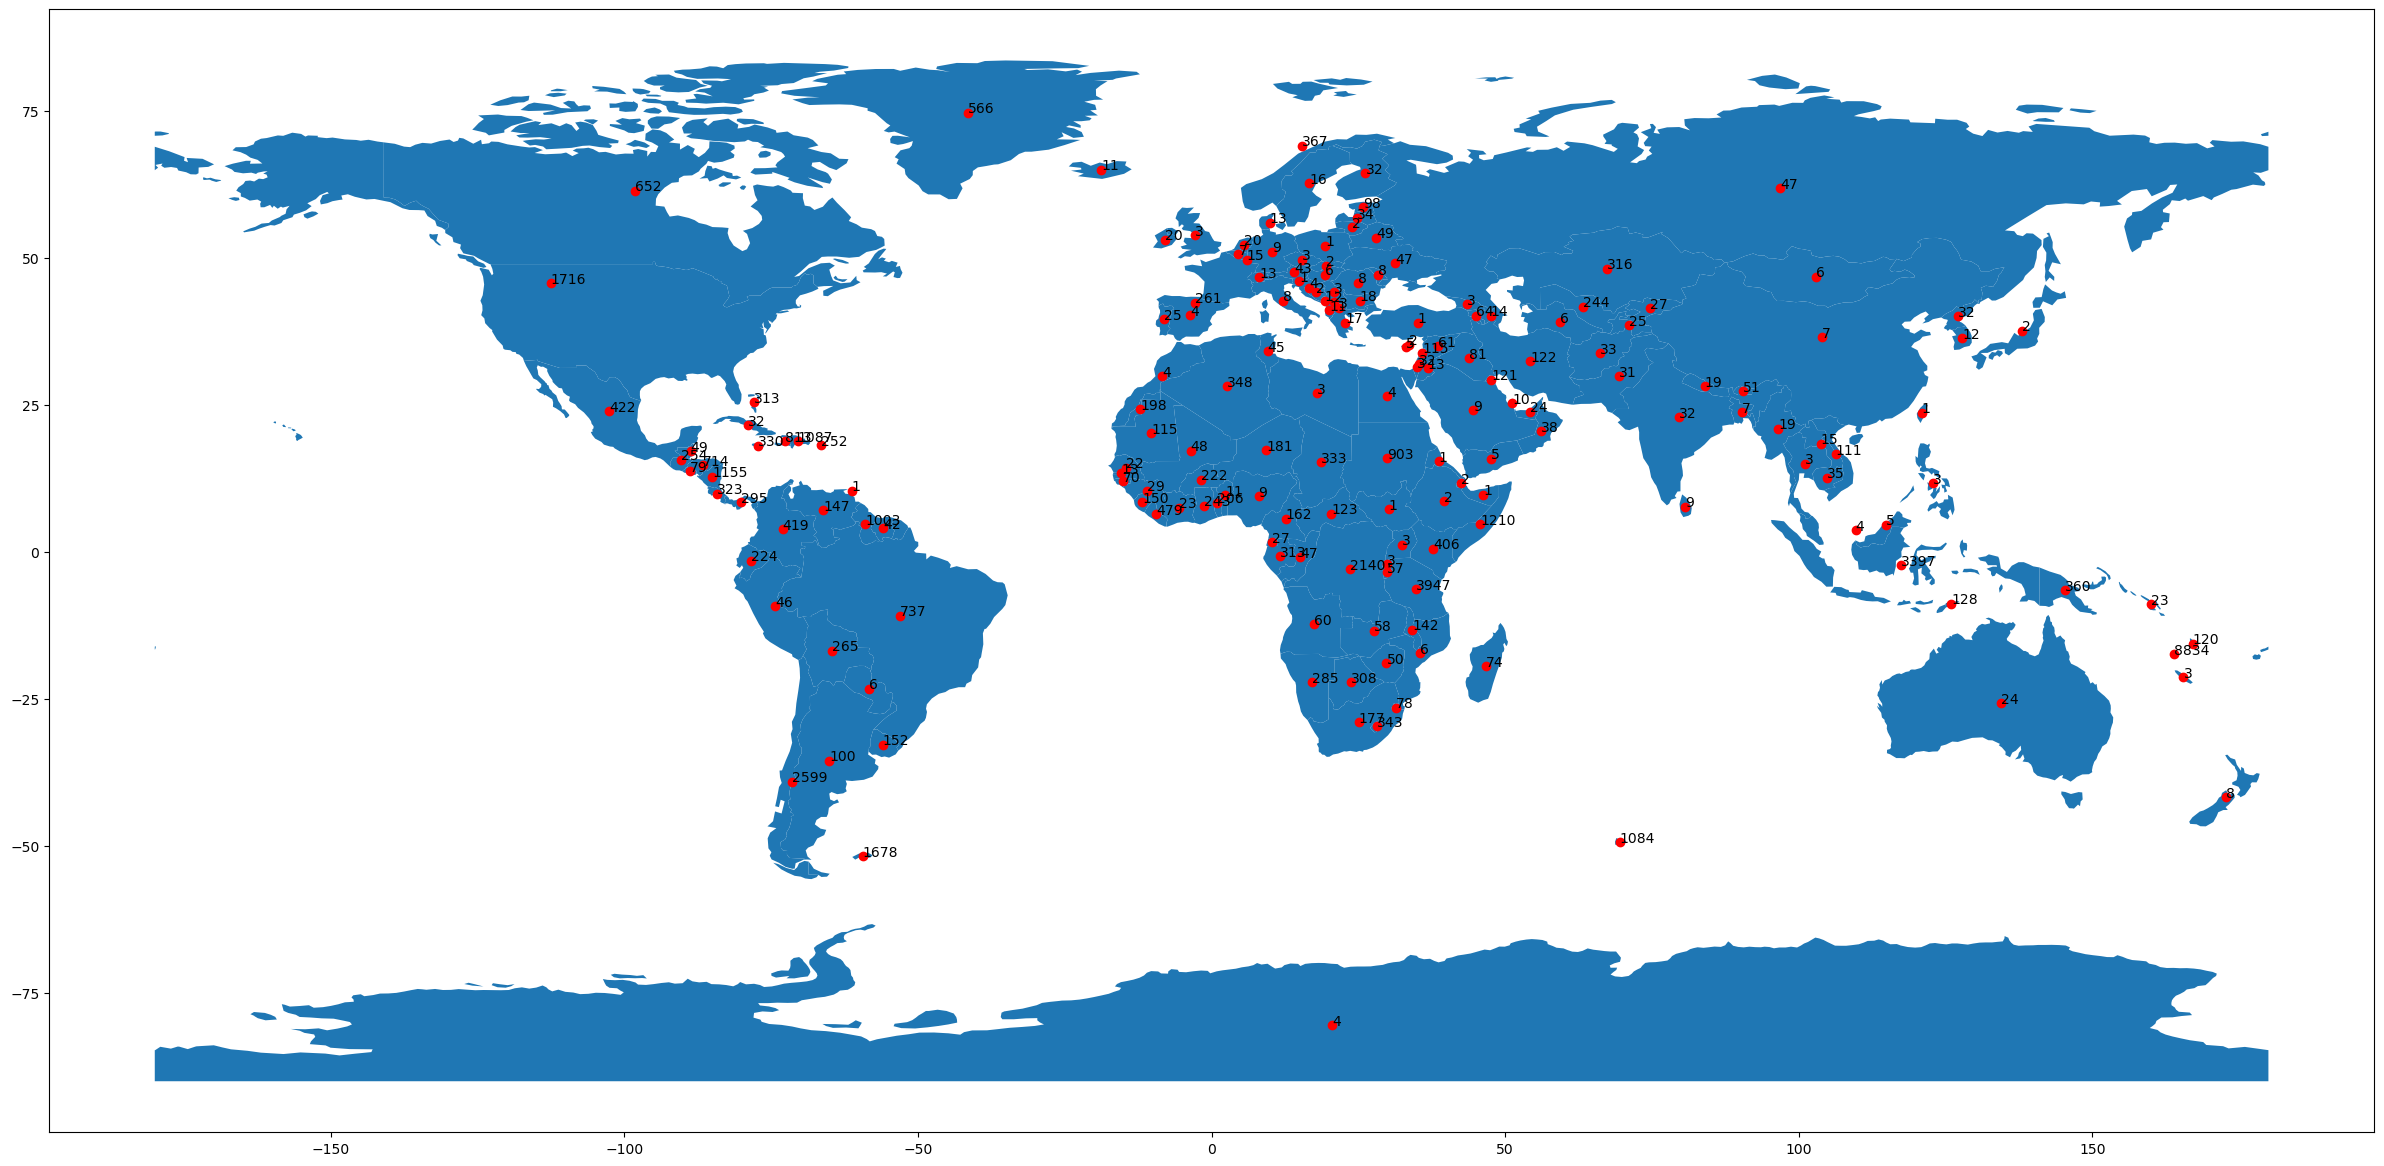

In [10]:
world['country_centroid'] = world.to_crs(epsg=4326).centroid

fig, ax = plt.subplots(figsize=(30,30))
world.plot(ax=ax)
world['country_centroid'].plot(ax=ax, color='red')

# for idx, label in enumerate(world['SOVEREIGNT']):
for idx, label in enumerate(country_counts.values()):
    ax.annotate(label, (world['country_centroid'].x[idx], world['country_centroid'].y[idx]))

plt.show()
country_counts

# EDA: What should be my salary if I were hired today?
I will try to predict a fair salary for myself given my answers to the StackOverflow 2024 developer survey.

In [ ]:
pprint.pprint(list(data.columns))

clean_data = data[[
    'MainBranch',
    'Age',
    # 'Employment',
    'RemoteWork',
    'YearsCodePro',
    'ConvertedCompYearly',
    'WorkExp'
 ]].dropna()
# clean_data = data.drop(columns=[
#     'Check',
#     'SurveyLength',
#     'SurveyEase',
#     'CompTotal',
#     'PurchaseInfluence',
#     'BuyNewTool',
#     'BuildvsBuy',
#     'TechEndorse',
#     'Currency',
#     'CompTotal',
#     'JobSatPoints_1',
#     'JobSatPoints_4',
#     'JobSatPoints_5',
#     'JobSatPoints_6',
#     'JobSatPoints_7',
#     'JobSatPoints_8',
#     'JobSatPoints_9',
#     'JobSatPoints_10',
#     'JobSatPoints_11',
#     'Knowledge_1',
#     'Knowledge_2',
#     'Knowledge_3',
#     'Knowledge_4',
#     'Knowledge_5',
#     'Knowledge_6',
#     'Knowledge_7',
#     'Knowledge_8',
#     'Knowledge_9',
#     'Frequency_1',
#     'Frequency_2',
#     'Frequency_3',
# ]).dropna()
print(list(clean_data.columns))

['Unnamed: 0',
 'ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'Off

Another example: predicting people's ages given their stackoverflow ansers.??? 

Tyring to predict if a user uses AI

In [ ]:
# data['MainBranch'].unique()
# data['WorkExp'].unique()
# data['LanguageHaveWorkedWith'] = data['LanguageHaveWorkedWith'].apply(str)
# # type(data['LanguageHaveWorkedWith'][4])
# # data['LanguageHaveWorkedWith'] = data[data['LanguageHaveWorkedWith'] != 'nan']
# clean_langs = data[data['LanguageHaveWorkedWith'] != 'nan']
# langs = unique_langs
# for answer in clean_langs['LanguageHaveWorkedWith']:
# #     print(answer)
#     langs = answer.split(';')
#     print(langs)

In [ ]:
lang_data = data[[
    'MainBranch',
    'Age',
    # 'Employment',
    'RemoteWork',
    'YearsCodePro',
    'ConvertedCompYearly',
    'WorkExp',
    'LanguageHaveWorkedWith'
 ]].dropna()
lang_data['LanguageHaveWorkedWith'] = lang_data['LanguageHaveWorkedWith'].apply(str)
lang_data = lang_data[lang_data['LanguageHaveWorkedWith'] != 'nan']
for lang in unique_langs:
    lang_data[lang] = False
for row in lang_data.head().iterrows():
    # print(row[0])
    # data.iloc(row[0])
    for used_lang in row[1]['LanguageHaveWorkedWith'].split(';'):
        lang_data.loc[row[0], used_lang] = True
# lang_data.drop(columns=[np.nan])
# lang_data['Python']
# print(list(lang_data.columns))
lang_data
# lang_data = lang_data[['']]
# data

,MainBranch,Age,RemoteWork,YearsCodePro,ConvertedCompYearly,WorkExp,LanguageHaveWorkedWith,Go,Swift,Zig,...,Java,Delphi,Bash/Shell (all shells),Lua,Dart,Fortran,Nim,Ada,Haskell,Cobol
1,I am a developer by profession,35-44 years old,"Hybrid (some remote, some in-person)",8,98814.0,8.0,Bash/Shell (all shells);C;C++;Go;Haskell;Prolo...,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,I am a developer by profession,25-34 years old,Remote,8,83777.0,8.0,C#;PowerShell,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,I am a developer by profession,25-34 years old,In-person,4,65518.0,4.0,Bash/Shell (all shells);C++;HTML/CSS;JavaScrip...,False,False,False,...,False,False,True,False,False,False,False,False,False,False
17,I am a developer by profession,25-34 years old,In-person,7,87841.0,7.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,False,False,False,...,False,False,True,False,False,False,False,False,False,False
24,I am a developer by profession,35-44 years old,"Hybrid (some remote, some in-person)",16,216559.0,16.0,Bash/Shell (all shells);Go;HTML/CSS;JavaScript...,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52319,I am a developer by profession,18-24 years old,Remote,4,20141.0,5.0,Bash/Shell (all shells);C;Dart;Go;HTML/CSS;Jav...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52327,I am a developer by profession,45-54 years old,Remote,10,25000.0,30.0,Delphi;PHP,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52335,I am a developer by profession,55-64 years old,In-person,36,240000.0,36.0,C;C++;HTML/CSS;JavaScript;SQL;VBA,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52337,I am a developer by profession,18-24 years old,Remote,3,54520.0,3.0,Assembly;Bash/Shell (all shells);C;C#;C++;HTML...,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
reg = linear_model.Lasso(alpha=0.1)
categorical_columns = list(clean_data.columns)
categorical_columns.remove('ConvertedCompYearly')
print(clean_data.head())
for lang in unique_langs:
    clean_data[lang] = lang_data[lang]
print(categorical_columns)
categorical_columns.remove('YearsCodePro')
categorical_columns.remove('WorkExp')
clean_data['WorkExp'] = clean_data['WorkExp'].dropna()
# print(clean_data.head())
data_pandas_encoded = pd.get_dummies(
    clean_data, 
    columns=categorical_columns,
    # drop_first=True
)

# print(data_pandas_encoded.columns)

def yearfunc(year):
    if year == 'Less than 1 year':
        return np.int64(0)
    elif year == 'More than 50 years':
        return np.int64(51)
    else:
        return np.int64(year)

data_pandas_encoded["YearsCodePro"] = data_pandas_encoded["YearsCodePro"].apply(yearfunc)

reg.fit(data_pandas_encoded, y=clean_data['ConvertedCompYearly'])

                        MainBranch              Age  \
1   I am a developer by profession  35-44 years old   
3   I am a developer by profession  25-34 years old   
5   I am a developer by profession  25-34 years old   
17  I am a developer by profession  25-34 years old   
24  I am a developer by profession  35-44 years old   

                              RemoteWork YearsCodePro  ConvertedCompYearly  \
1   Hybrid (some remote, some in-person)            8              98814.0   
3                                 Remote            8              83777.0   
5                              In-person            4              65518.0   
17                             In-person            7              87841.0   
24  Hybrid (some remote, some in-person)           16             216559.0   

    WorkExp  
1       8.0  
3       8.0  
5       4.0  
17      7.0  
24     16.0  
['MainBranch', 'Age', 'RemoteWork', 'YearsCodePro', 'WorkExp']


ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# clean_data
pprint.pprint(dict(data_pandas_encoded.loc[1]))
# data['LanguageHaveWorkedWith'][1]

{'Ada': False,
 'Age_18-24 years old': False,
 'Age_25-34 years old': False,
 'Age_35-44 years old': True,
 'Age_45-54 years old': False,
 'Age_55-64 years old': False,
 'Age_65 years or older': False,
 'Age_Prefer not to say': False,
 'Age_Under 18 years old': False,
 'Apex': False,
 'Assembly': False,
 'Bash/Shell (all shells)': True,
 'C': True,
 'C#': False,
 'C++': True,
 'Clojure': False,
 'Cobol': False,
 'ConvertedCompYearly': 98814.0,
 'Crystal': False,
 'Dart': False,
 'Delphi': False,
 'Elixir': False,
 'Erlang': False,
 'F#': False,
 'Fortran': False,
 'GDScript': False,
 'Go': True,
 'Groovy': False,
 'HTML/CSS': False,
 'Haskell': True,
 'Java': False,
 'JavaScript': False,
 'Julia': False,
 'Kotlin': False,
 'Lisp': False,
 'Lua': False,
 'MATLAB': False,
 'MainBranch_I am a developer by profession': True,
 'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies': False,
 'MicroPython': False,
 'Nim': False,
 'OCaml': False,
 'Ob

In [ ]:
# clean_data['Employment'].unique()

# pprint.pprint(list(data_pandas_encoded.columns))
print(list(data_pandas_encoded.columns))
# data_pandas_encoded.head()


['YearsCodePro', 'ConvertedCompYearly', 'WorkExp', 'Go', 'Swift', 'Zig', 'Groovy', 'F#', 'C#', 'Erlang', 'Zephyr', 'Python', 'Solidity', 'C', 'Clojure', 'Julia', 'PowerShell', 'Kotlin', 'MATLAB', 'Scala', 'OCaml', 'Ruby', 'Perl', 'Lisp', 'VBA', 'JavaScript', 'Objective-C', 'SQL', 'R', 'C++', 'Crystal', 'PHP', 'Prolog', 'Rust', 'MicroPython', 'TypeScript', 'Elixir', 'Visual Basic (.Net)', 'GDScript', 'Apex', 'HTML/CSS', 'Assembly', 'Java', 'Delphi', 'Bash/Shell (all shells)', 'Lua', 'Dart', 'Fortran', 'Nim', 'Ada', 'Haskell', 'Cobol', 'MainBranch_I am a developer by profession', 'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies', 'Age_18-24 years old', 'Age_25-34 years old', 'Age_35-44 years old', 'Age_45-54 years old', 'Age_55-64 years old', 'Age_65 years or older', 'Age_Prefer not to say', 'Age_Under 18 years old', 'RemoteWork_Hybrid (some remote, some in-person)', 'RemoteWork_In-person', 'RemoteWork_Remote']


In [ ]:
sample = {key: False for _, key in enumerate(data_pandas_encoded.columns)}
pos_sample = {key: True for _, key in enumerate(data_pandas_encoded.columns)}
print(sample.keys())
sample['MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies'] = True
sample['Age_18-24 years old'] = True
sample['RemoteWork_In-person'] = True
sample['YearsCodePro'] = 0
sample['WorkExp'] = 0
sample['ConvertedCompYearly'] = 0
sample['TypeScript_True'] = True
sample['TypeScript_False'] = False
sample['C_True'] = True
sample['C_False'] = False
sample['SQL_True'] = True
sample['SQL_False'] = False
sample['Python_True'] = True
sample['Python_False'] = False
sample['R_True'] = True
sample['R_False'] = False
sample['Kotlin_False'] = False
sample['Java_False'] = False
sample['HTML/CSS_True'] = True
sample['HTML/CSS_False'] = False
sample['Swift_False'] = False
# sample = pd.DataFrame(sample, index=[0]) # , index=data_pandas_encoded.index)
pos_sample = pd.DataFrame(pos_sample, index=[0]) # , index=data_pandas_encoded.index)
# reg.predict([['I am learning to code', '18-24 years old', 'Student, full-time', 'In-person', '0', '0']])
# prediction = reg.predict([list(sample.values())])
# prediction = reg.predict(sample)
prediction = reg.predict(pos_sample)

dict_keys(['YearsCodePro', 'ConvertedCompYearly', 'WorkExp', 'Go', 'Swift', 'Zig', 'Groovy', 'F#', 'C#', 'Erlang', 'Zephyr', 'Python', 'Solidity', 'C', 'Clojure', 'Julia', 'PowerShell', 'Kotlin', 'MATLAB', 'Scala', 'OCaml', 'Ruby', 'Perl', 'Lisp', 'VBA', 'JavaScript', 'Objective-C', 'SQL', 'R', 'C++', 'Crystal', 'PHP', 'Prolog', 'Rust', 'MicroPython', 'TypeScript', 'Elixir', 'Visual Basic (.Net)', 'GDScript', 'Apex', 'HTML/CSS', 'Assembly', 'Java', 'Delphi', 'Bash/Shell (all shells)', 'Lua', 'Dart', 'Fortran', 'Nim', 'Ada', 'Haskell', 'Cobol', 'MainBranch_I am a developer by profession', 'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies', 'Age_18-24 years old', 'Age_25-34 years old', 'Age_35-44 years old', 'Age_45-54 years old', 'Age_55-64 years old', 'Age_65 years or older', 'Age_Prefer not to say', 'Age_Under 18 years old', 'RemoteWork_Hybrid (some remote, some in-person)', 'RemoteWork_In-person', 'RemoteWork_Remote'])


AttributeError: 'Lasso' object has no attribute 'coef_'

In [ ]:
#plt.plot(prediction, "b.")
print(prediction)
sample

NameError: name 'prediction' is not defined

In [ ]:
reg.predict(data.sample(1))

# Take a single row from the dataframe
# run that through the same one-hot encoding
# Run it through the lasso training
# Put that manipulated example through the reg.predict

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AIAcc
- AIBen
- AIChallenges
- AIComplex
- AIEthics
- ...
Feature names seen at fit time, yet now missing:
- Ada
- Age_18-24 years old
- Age_25-34 years old
- Age_35-44 years old
- Age_45-54 years old
- ...


In [ ]:
clean_data = data[['YearsCodePro', 'YearsCode', 'WorkExp', 'ConvertedCompYearly']].dropna()
X = clean_data[['YearsCodePro', 'YearsCode', 'WorkExp']]
X['YearsCode'] = X['YearsCode'].apply(yearfunc)
X['YearsCodePro'] = X['YearsCodePro'].apply(yearfunc)
X['WorkExp'] = X['WorkExp'].apply(yearfunc)
y = clean_data[['ConvertedCompYearly']]
y.head(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
reg.fit(X_train, y_train)


/var/folders/lm/1b6g2_5j72j1h3qmrgj124dh0000gn/T/ipykernel_41025/2058258792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearsCode'] = X['YearsCode'].apply(yearfunc)
/var/folders/lm/1b6g2_5j72j1h3qmrgj124dh0000gn/T/ipykernel_41025/2058258792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearsCodePro'] = X['YearsCodePro'].apply(yearfunc)
/var/folders/lm/1b6g2_5j72j1h3qmrgj124dh0000gn/T/ipykernel_41025/2058258792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Lasso(alpha=0.1)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(X_test)
mean_absolute_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.005209547190535013

In [ ]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso_cv = GridSearchCV(reg, param_grid, cv=3, n_jobs=-1)
lasso_cv.fit(X_train, y_train)
y_pred2 = lasso_cv.predict(X_test)
mean_absolute_error(y_test, y_pred2)
mean_squared_error(y_test, y_pred2)
r2_score(y_test, y_pred2)
lasso_cv.best_estimator_

Lasso(alpha=1)

In [ ]:
lasso3 = linear_model.Lasso(alpha=1)
lasso3.fit(X_train, y_train)

Lasso(alpha=1)

In [ ]:
# lasso3.intercept_
# lasso3.coef_
# sample = pd.DataFrame({
#     'YearsCodePro': 0,
#     'YearsCode': 6,
#     'WorkExp': 0},
#     index=clean_data.index
# )
prediction = lasso3.predict([[0,0,0.5]])
prediction


array([87506.58834062])

In [ ]:
new_sample = pd.DataFrame({
    'YearsCodePro': 0,
    'ConvertedCompYearly': 0,
    'WorkExp': 0},
    index=new_data.index
)
new_prediction = reg.predict(new_sample)
new_prediction

array([2.48401193e-07, 2.48401193e-07, 2.48401193e-07, ...,
       2.48401193e-07, 2.48401193e-07, 2.48401193e-07])

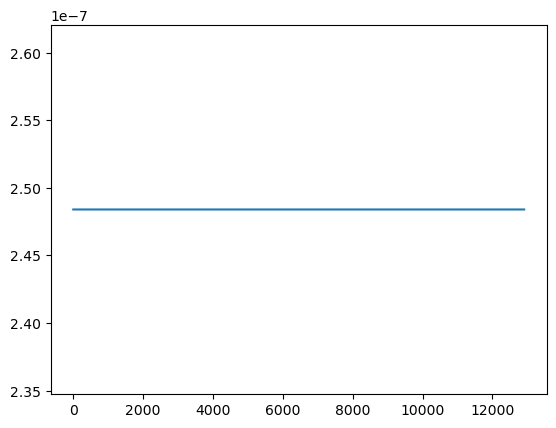

In [ ]:
plt.plot(new_prediction)

In [ ]:
# On Wednesday, Ask Dr. Fenner what he wants in the final presentation. I'll put everything into a polished notebook with text descriptions and whatnot. However, what sections should I include in that notebook?